In [1]:
#Importing all the required library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the Dataset

In [4]:
df=pd.read_csv('C:/Users/User/Documents/Data Trained/Data Science Class resources/DSData-master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.shape

(200, 5)

In [8]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [9]:
#Dropping unnamed column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
df.shape

(200, 4)

In [11]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [12]:
#Checking the null values(if any)
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

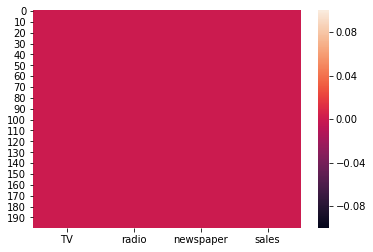

In [13]:
sns.heatmap(df.isnull())
plt.show()

In [14]:
#Statitical Summary of the data
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
#checking the correlation
dfcor=df.corr()

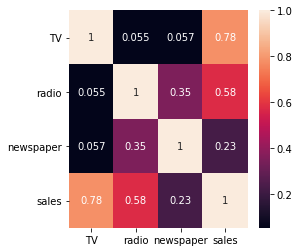

In [16]:
plt.figure(figsize=(4,4))
sns.heatmap(dfcor,annot=True)
plt.show()

In [17]:
# Univariate Analysis

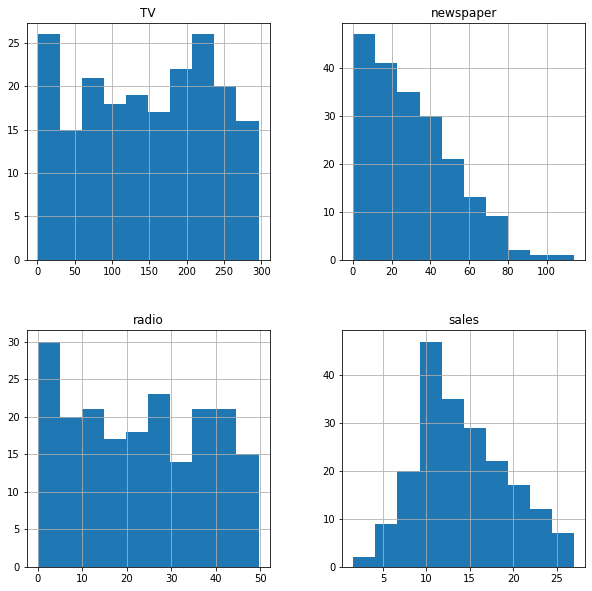

In [18]:
df.hist(figsize=(10,10))
plt.show()

In [19]:
#Bivariate Analysis

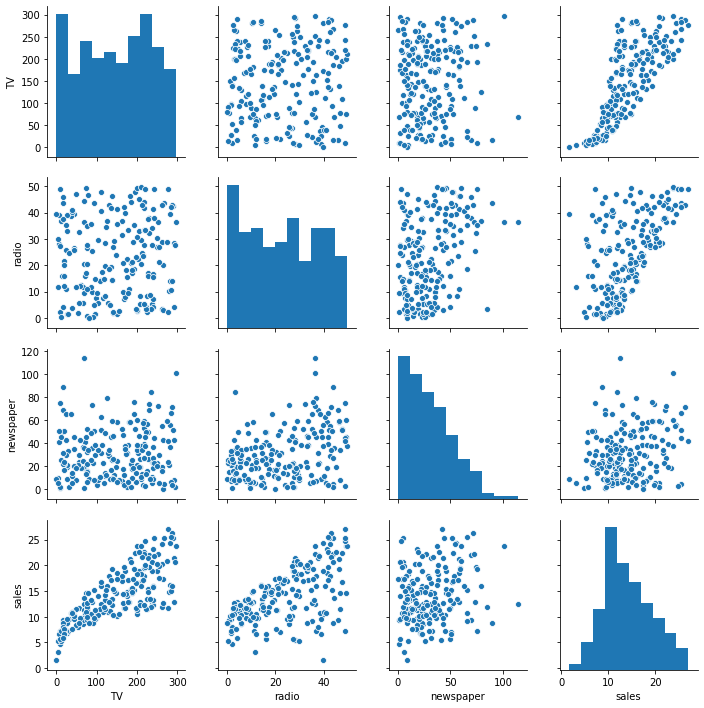

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
collist=df.columns.values
ncol=12
nrows=10

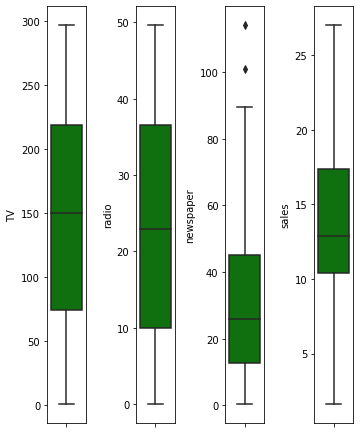

In [22]:
plt.figure(figsize=(15,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

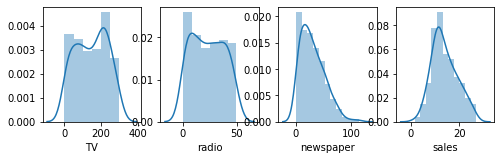

In [23]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

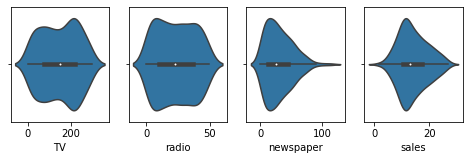

In [24]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.violinplot(df[collist[i]])

In [25]:
#Checking the skewness of the data
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [26]:
#As there are few skewed values, we try correct it by using cuberoot transformation
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.cbrt(df[col])

In [27]:
#we have removed the skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.265522
sales        0.407571
dtype: float64

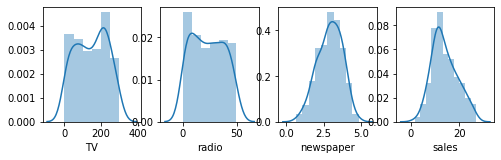

In [28]:
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [29]:
#Checking the Zscore for outliers and removing (if any)
from scipy.stats import zscore
z_score=abs(zscore(df))
df.shape

(200, 4)

In [30]:
df_final=df.loc[(z_score<3).all(axis=1)]
df_final.shape

(200, 4)

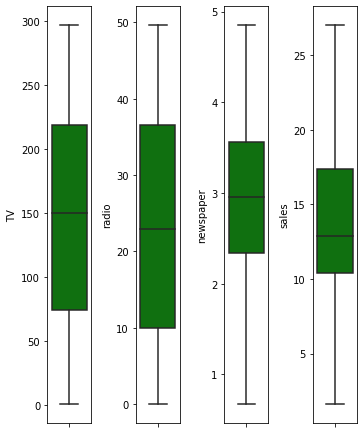

In [31]:
plt.figure(figsize=(15,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [32]:
#separating independent and dependent variables
df_x=df.drop(columns=['sales'])
y=df[['sales']]

In [33]:
#Scaling the data using StandardScaler
sc=StandardScaler()
sc.fit(df_x)
df_x=sc.transform(df_x)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.25,random_state=42)

In [35]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(150, 3) (50, 3)
(150, 1) (50, 1)


In [36]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)
XGR=XGBRegressor(random_state=42)

In [37]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [38]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    mae=mean_absolute_error(y_test,pre)
    print("Mean_Absolute_Error =",mae)
    MAE.append(round(mae,3))
    score= cross_val_score(model,df_x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.8936775960318448
Mean_Squared_Error = 2.8756620829028012
Mean_Absolute_Error = 1.4047462539004847
Cross_Val_Score =  0.8856868533734576


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.8306448872031147
Mean_Squared_Error = 4.580484058294946
Mean_Absolute_Error = 1.5509495109106015
Cross_Val_Score =  0.8148582392201715


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.8937914155936433
Mean_Squared_Erro

In [39]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error':MAE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Cross_val_score
0,LinearRegression,0.893678,2.876,1.405,0.886
1,Lasso,0.830645,4.580,1.551,0.815
2,Ridge,0.893791,2.873,1.402,0.886
3,ElasticNet,0.736844,7.117,2.133,0.730
4,DecisionTreeRegressor,0.924797,2.034,0.964,0.953
5,KNeighborsRegressor,0.935775,1.737,0.993,0.937
6,AdaBoostRegressor,0.955624,1.200,0.949,0.960
7,RandomForestRegressor,0.970872,0.788,0.734,0.973
8,GradientBoostingRegressor,0.985032,0.405,0.515,0.981
9,XGBRegressor,0.981121,0.511,0.556,0.975


In [40]:
#Lets use GridsearchCV for hyperparamenter tuning
parameterGBR={
            'n_estimators':[100,200,300], 
            'loss':['ls', 'lad', 'huber', 'quantile'],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[3,4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] 
            } 
gridGBR = GridSearchCV(GBR, param_grid=parameterGBR, n_jobs=-1, cv=10)
gridGBR.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [41]:
gridGBR.best_score_ , gridGBR.best_params_

(0.972928741556371,
 {'learning_rate': 0.1,
  'loss': 'lad',
  'max_depth': 3,
  'max_features': 1.0,
  'min_samples_leaf': 3,
  'n_estimators': 300})

In [43]:
GBR=GradientBoostingRegressor(learning_rate= 0.1,
  loss='lad',
  max_depth= 3,
  max_features= 1.0,
  min_samples_leaf= 3,
  n_estimators= 300)
GBR.fit(x_train,y_train)
score=cross_val_score(GBR,df_x,y,cv=10,scoring='r2').mean()
print(score)

0.9783804857334131


In [49]:
#Lets use GridsearchCV for hyperparamenter tuning for XGBRegressor

In [45]:
parameterXGR={
            'n_estimators':[100,200,300,400], 
            'loss':['ls', 'lad', 'huber', 'quantile'],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[3,4,5], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] 
            } 
gridXGR = GridSearchCV(XGR, param_grid=parameterXGR, n_jobs=-1, cv=10)
gridXGR.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster=None,
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    scale_pos_weight=1, subsample=1,
                                    tree_method=None, validate_parameters=False,
                                    verbosity=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.02],
                         'lo

In [46]:
gridXGR.best_score_ , gridXGR.best_params_

(0.9716337101817678,
 {'learning_rate': 0.1,
  'loss': 'ls',
  'max_depth': 4,
  'max_features': 1.0,
  'min_samples_leaf': 3,
  'n_estimators': 400})

In [47]:
XGR=XGBRegressor(learning_rate= 0.1,
  loss='ls',
  max_depth= 4,
  max_features= 1.0,
  min_samples_leaf= 3,
  n_estimators= 400)
XGR.fit(x_train,y_train)
score=cross_val_score(XGR,df_x,y,cv=10,scoring='r2').mean()
print(score)

0.9816727434220303


In [ ]:
from sklearn.externals import joblib
joblib.dump(XGR,'Sales_Channel_XGR.pkl')